# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [62]:
%load_ext autoreload
%autoreload 2

from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [4]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [5]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Let's define a few helper functions for loading images from a URL

In [6]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

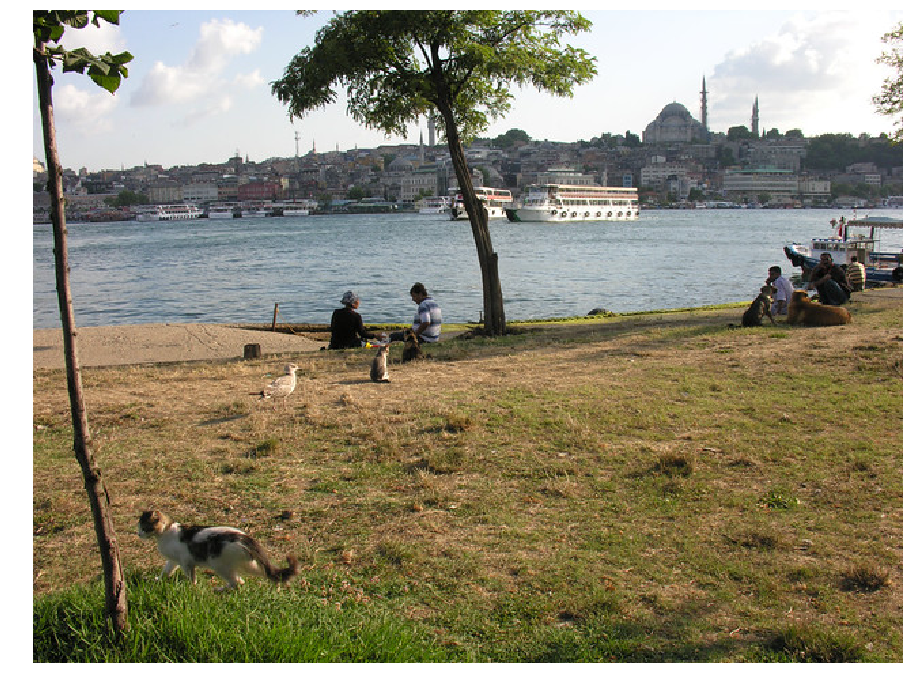

In [7]:
# from http://cocodataset.org/#explore?id=345434
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
imshow(image)

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

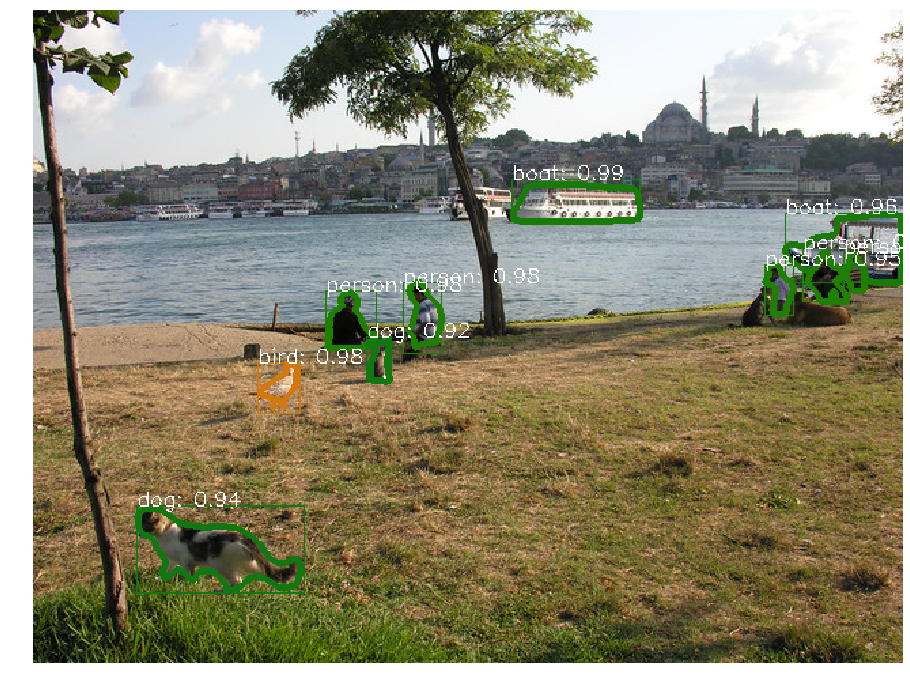

In [38]:
# compute predictions
predictions, result = coco_demo.run_on_opencv_image(image)
imshow(result)

In [40]:
predictions.bbox

tensor([[352.7150, 124.3093, 446.7372, 155.3866],
        [165.9042, 259.4644, 196.5871, 296.5522],
        [272.0613, 200.5989, 300.8904, 252.6106],
        [215.8138, 206.8337, 252.0270, 249.3495],
        [553.4437, 149.7749, 639.3996, 200.2117],
        [538.0186, 187.9440, 559.2899, 224.4293],
        [ 76.5012, 364.9478, 199.6254, 428.4163],
        [245.8250, 240.5307, 263.5486, 273.7529],
        [596.6272, 178.5490, 611.5908, 207.1187],
        [566.0130, 175.7442, 600.2266, 214.8722]])

In [16]:
features[0]

torch.Size([1000, 1024])

In [49]:
boxes = coco_demo.extract_encoding_features([image])
# boxes = boxes[0].resize((image.shape[1], image.shape[0]))
# boxes = coco_demo.select_top_predictions(boxes)
boxes = boxes[0]

In [50]:
boxes.get_field("encoding_features").shape

torch.Size([11, 1024])

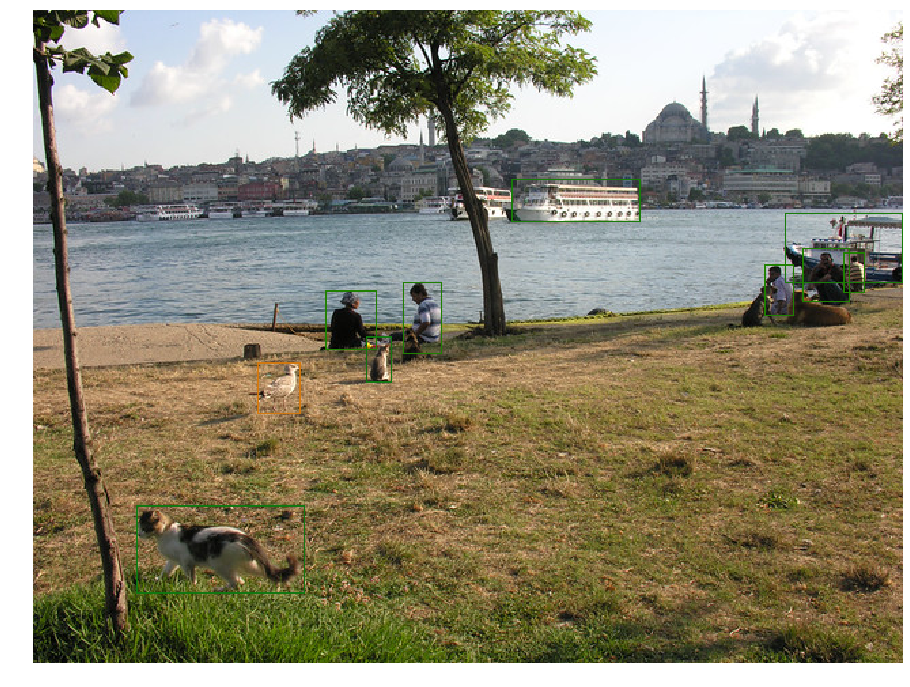

In [35]:
result2 = coco_demo.overlay_boxes(image.copy(), boxes)
imshow(result2)

# Image URL

In [55]:
url = 'https://ie.trafficland.com/v1.0/404103/huge?system=weatherbug-mobile&pubtoken=8dc39a9d9c6bd466b234c83c5f89839654a7f237c34fb83d6b1504add0aeb0d0&refreshRate=2000&rnd='

## FasterRCNN ResNet101 Demo

In [56]:
# set up demo for keypoints
config_file = "../configs/caffe2/e2e_faster_rcnn_R_101_FPN_1x_caffe2.yaml"
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])
cfg.merge_from_list(["MODEL.MASK_ON", False])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.5,
)

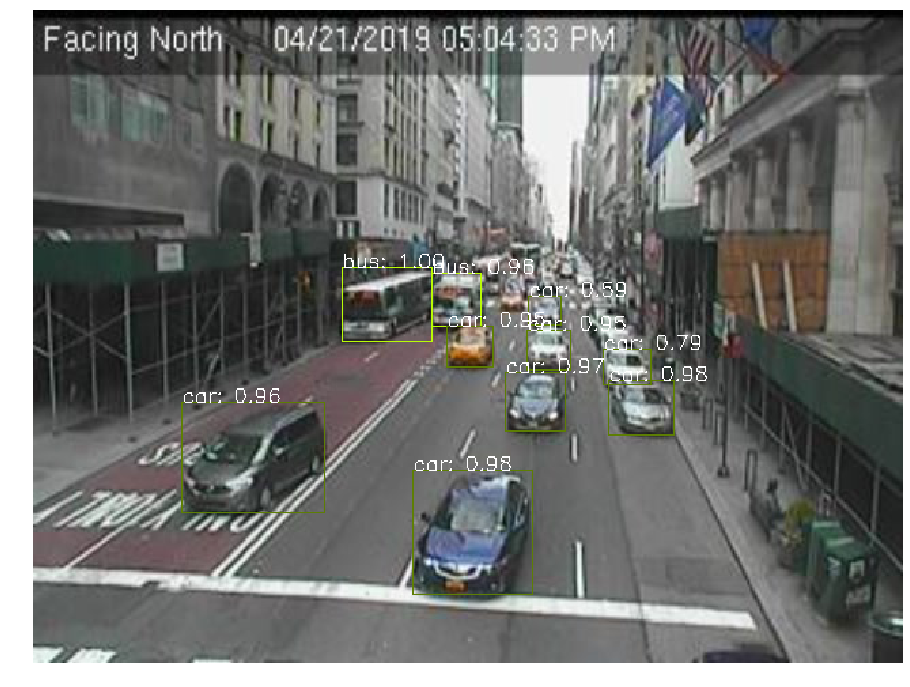

In [57]:
# run demo
image = load(url)
predictions, result = coco_demo.run_on_opencv_image(image)
imshow(result)

In [60]:
boxes = coco_demo.extract_encoding_features([image], top_k=19)
boxes = boxes[0]

In [61]:
boxes.get_field("encoding_features").shape

torch.Size([20, 1024])

# MaskRCNN Model Demo

In [ ]:
# set up demo for keypoints
config_file = "../configs/caffe2/e2e_mask_rcnn_R_101_FPN_1x_caffe2.yaml"
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])
cfg.merge_from_list(["MODEL.MASK_ON", False])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.5,
)

In [ ]:
# run demo
image = load(url)
features, predictions, result = coco_demo.run_on_opencv_image(image)
imshow(result)

In [ ]:
features.shape

In [ ]:
labels = predictions.get_field("labels")
[COCODemo.CATEGORIES[i] for i in labels]